# Movie Recommendation System: Data Analysis and Preprocessing

The purpose of this project is to analyze movie data and build a recommendation system. We aim to understand relationships between different movie features, such as budget, ratings, and genres, and use this information to suggest similar movies to users.


In [4]:
#import library need 
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Goals:
Conduct Exploratory Data Analysis (EDA) to understand the relationships between various features. 


Analyze how budget impacts ratings.


Identify genres with the highest average ratings.


Build a content-based recommendation system using movie descriptions and genres.


Provide movie recommendations based on user input.

## Step 2: Load Datasets

In [5]:
# save datasets in data fram
df_movies=pd.read_csv("tmdb_5000_movies.csv")
df_credits=pd.read_csv("tmdb_5000_credits.csv")

In [6]:
# Preview the first few rows of each dataset
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## QUESTIONS PART 
# 1- Is the rating effective by budget?


# 2- what is the most genre have rating?


## Step 3: Preprocess the Data

### 3.1 Check for Missing Values and Duplicates


In [7]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [8]:
df_movies.duplicated().sum()

0

## as you see the dataset has some missed values but the missing value is not important in our (EDA)

## Step 4: Exploratory Data Analysis (EDA)

### 4.1 Analysis of Ratings vs. Budget

We want to determine if higher budgets result in better ratings.

In [9]:
df_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [10]:
df_movies_rb=df_movies[['budget','vote_average','vote_count']]

In [11]:
df_movies_rb.head()

,budget,vote_average,vote_count
0,237000000,7.2,11800
1,300000000,6.9,4500
2,245000000,6.3,4466
3,250000000,7.6,9106
4,260000000,6.1,2124


In [12]:
df_movies_rb[(df_movies_rb['vote_count']<500) & (df_movies_rb['vote_average']>8)]

,budget,vote_average,vote_count
2386,0,9.3,2
2796,0,8.4,11
2947,10000000,8.2,12
2970,10500000,8.5,2
3041,10000000,8.1,12
3519,0,10.0,1
3723,0,8.2,68
3788,4000000,8.1,18
3906,3000000,8.1,483
3992,0,9.5,2


know we will compare but before doing it there are two cases we should include the number of vote_count should be at least 500 why because is unfair to the comparison between two movies one with a number of votes of 1 and a score of 10 and the other with the number of votes 1000 with score 8  and the budget over 0 why 
because the 0 means the company doesn't announce budget of movie.


In [13]:
df_comparison=df_movies_rb[(df_movies_rb['vote_count']>=500) & (df_movies_rb['budget']>0)]

In [14]:
df_comparison.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1588 entries, 0 to 4796
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        1588 non-null   int64  
 1   vote_average  1588 non-null   float64
 2   vote_count    1588 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 49.6 KB


as you see the number of entries is less than before but is more accurate than the previous and the samples is good know to do the comparison 

### 4.2 Scatter Plot: Relationship Between Ratings and Budget


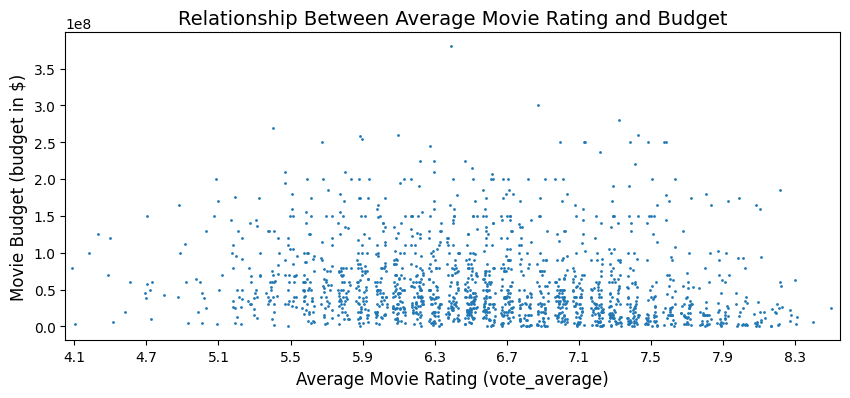

In [44]:
# Adjust figure size for better clarity
plt.figure(figsize=(10, 4))



sns.stripplot(data=df_comparison, x='vote_average', y='budget', size=2, jitter=0.35)

# Improve axis labels and title with more descriptive text and larger font sizes
plt.xlabel('Average Movie Rating (vote_average)', fontsize=12)
plt.ylabel('Movie Budget (budget in $)', fontsize=12)
plt.title('Relationship Between Average Movie Rating and Budget', fontsize=14)
pos, lab = plt.xticks()
plt.xticks(pos[::4], lab[::4])
plt.show()

In [16]:
df_comparison['vote_average'].corr(df_comparison['budget'])

-0.16893829435779936

Correlation Coefficient:  The correlation between budget and rating is -0.168, indicating a slight negative relationship. Higher-budget movies tend to have slightly lower ratings.


### 4.3 Analysis of Ratings by Genre

We analyze which genres tend to have higher average ratings.

In [17]:
import ast
df=df_movies.copy()
# Convert the JSON-like strings into lists of dictionaries
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x))

# Extract the genre names into a new column
df['genre_names'] = df['genres'].apply(lambda x: [genre['name'] for genre in x])

# Display the DataFrame
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_names
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]"
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]"
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]"
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]"


### 4.4 Analysis of Genre vs. Budget and Rating

In [18]:
df_exploded = df.explode('genre_names')
df_exploded.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_names
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Adventure
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Fantasy
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Science Fiction
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure


In [19]:
df_cost_genre=df_exploded[['budget','genre_names']]

df_cost_genre=df_cost_genre[(df_cost_genre['budget']>0)]

df_cost_genre.head(10)

,budget,genre_names
0,237000000,Action
0,237000000,Adventure
0,237000000,Fantasy
0,237000000,Science Fiction
1,300000000,Adventure
1,300000000,Fantasy
1,300000000,Action
2,245000000,Action
2,245000000,Adventure
2,245000000,Crime


In [20]:
df_cost_genre.groupby('genre_names').mean().sort_values(by='budget', ascending=False)

,budget
genre_names,
Animation,7.477414e+07
Adventure,7.287652e+07
Fantasy,7.110738e+07
Family,6.346124e+07
Action,5.856493e+07
Science Fiction,5.841699e+07
War,3.848995e+07
Thriller,3.795666e+07
Mystery,3.602384e+07


In [21]:
df_vote_genre=df_exploded[['vote_average','vote_count','genre_names']]

df_vote_genre=df_vote_genre[(df_vote_genre['vote_count']>=500)]

df_vote_genre.head()

,vote_average,vote_count,genre_names
0,7.2,11800,Action
0,7.2,11800,Adventure
0,7.2,11800,Fantasy
0,7.2,11800,Science Fiction
1,6.9,4500,Adventure


In [22]:
# Group by 'genre_names' and aggregate 'vote_average' with the mean and 'vote_count' with the count
df_aggregated = df_vote_genre.groupby('genre_names').agg({'vote_average': 'mean', 'vote_count': 'sum'})

# Sort the resulting DataFrame by 'vote_average' in descending order
df_aggregated.sort_values(by='vote_average', ascending=False)


,vote_average,vote_count
genre_names,,
War,7.132759,97227
History,7.124561,77619
Western,7.042857,41875
Drama,6.951057,998942
Music,6.785366,40236
Animation,6.723846,274395
Romance,6.688085,317762
Crime,6.687361,448570
Mystery,6.646763,237412


### Highest Rated Genres:
Drama and Action genres have higher average ratings among movies with at least 500 votes.
Other well-rated genres include Adventure and Mystery.

# 5-bulid recomandations

In [23]:
df_re=df_movies.copy()

df_re['genres'] = df_re['genres'].apply(lambda x: ast.literal_eval(x))
df_re['genre_names'] = df_re['genres'].apply(lambda x: [genre['name'] for genre in x])

# Combine 'overview' and 'genre_names' into a single text column
df_re['combined_features'] = df_re['overview'] + " " + df_re['genre_names'].apply(lambda x: " ".join(x))

In [26]:
df_re.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_names,combined_features
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di..."
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha..."
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca..."


In [27]:
# Create a TF-IDF Vectorizer to remove stop words and convert the text data into numerical format
tfidf = TfidfVectorizer(stop_words='english')

df_re['combined_features'] = df_re['combined_features'].fillna('')

# Apply TF-IDF transformation on the combined features
tfidf_matrix = tfidf.fit_transform(df_re['combined_features'])


In [28]:
# Compute cosine similarity matrix for the TF-IDF matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Output the shape of the cosine similarity matrix
print(cosine_sim.shape)  # Should be (number of movies, number of movies)


(4803, 4803)


In [29]:
# Create a series mapping movie titles to indices for easier look-up
indices = pd.Series(df_movies.index, index=df_movies['title']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwise similarity scores for all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top 10 most similar movies
    sim_scores = sim_scores[1:11]  # Exclude the first movie as it is itself
    movie_indices = [i[0] for i in sim_scores]

    # Return the titles of the most similar movies
    return df_movies['title'].iloc[movie_indices]


In [42]:
# Example: Get recommendations for a specific movie
recommendations = get_recommendations('The Dark Knight')
print(recommendations)


3                         The Dark Knight Rises
428                              Batman Returns
3854    Batman: The Dark Knight Returns, Part 2
299                              Batman Forever
119                               Batman Begins
1359                                     Batman
1181                                        JFK
2507                                  Slow Burn
879                         Law Abiding Citizen
9            Batman v Superman: Dawn of Justice
Name: title, dtype: object


In [31]:
def average_similarity(movie_title, cosine_sim=cosine_sim):
    idx = indices[movie_title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]
    avg_similarity = sum([score[1] for score in sim_scores]) / len(sim_scores)
    return avg_similarity

# Example usage
avg_similarity = average_similarity('The Dark Knight')
print(f"Average similarity for recommendations of 'The Dark Knight': {avg_similarity}")


Average similarity for recommendations of 'The Dark Knight': 0.18792411487276683


In [32]:
import numpy as np

# Get random indices to calculate baseline similarity
random_indices = np.random.choice(len(df_movies), size=10, replace=False)
random_similarities = [cosine_sim[i, random_indices].mean() for i in random_indices]
average_random_similarity = np.mean(random_similarities)
print(f"Average similarity between random movies: {average_random_similarity}")


Average similarity between random movies: 0.11099205412087458


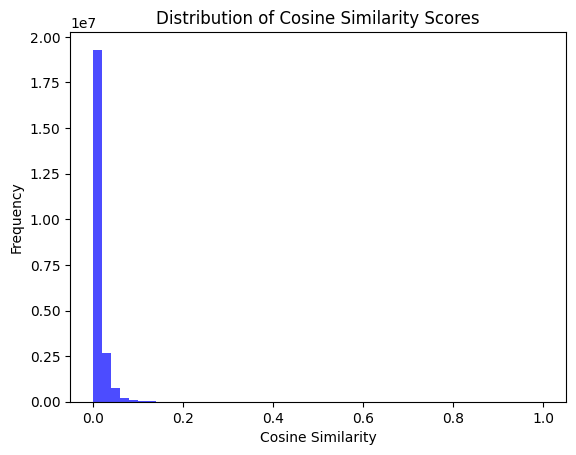

In [33]:
# Example: Flatten cosine similarity matrix into a list and plot a histogram
similarity_values = cosine_sim.flatten()
plt.hist(similarity_values, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()


# 6-Conclusion
## Summary of Findings:

Higher-budget movies have a slight tendency towards lower ratings, as indicated by the negative correlation.


Drama and Action are among the highest-rated genres based on user votes.


The recommendation system uses content-based filtering and is capable of suggesting similar movies based on genres and descriptions.


## Future Work:

Improve the recommendation model by incorporating collaborative filtering methods.


Evaluate the model's performance using metrics like RMSE, Precision, and Recall.


Deploy the model using a web framework like Flask or Streamlit for user interaction.
